In [1]:
# Importing of necessary Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("flights_data.csv") #loading dataset

In [3]:
df.head(2) #reading first 2 rows of the dataset

,Unnamed: 0,Date,Company,Departure,Source,Duration,Stoppages,Arrival,Destination,Price
0,0,Fri-29Oct2021,Indigo,11:00,Delhi,02h 05m,non-stop,13:05,Mumbai,"5,955"
1,1,Fri-29Oct2021,Indigo,13:10,Delhi,02h 05m,non-stop,15:15,Mumbai,"5,955"


**Data Cleaning**

In [3]:
#Removing Unnamed: 0 from the dataset

df.drop(['Unnamed: 0'], axis =1, inplace = True)

In [5]:
df.shape #checking number of rows and columns for the dataset.

(2054, 9)

Collected dataset has 2054 rows and 9 columns out of which 8 are independent and one which is Price is a dependent variable.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2054 entries, 0 to 2053
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Date         2054 non-null   object
 1   Company      2054 non-null   object
 2   Departure    2054 non-null   object
 3   Source       2054 non-null   object
 4   Duration     2054 non-null   object
 5   Stoppages    2054 non-null   object
 6   Arrival      2054 non-null   object
 7   Destination  2054 non-null   object
 8   Price        2054 non-null   object
dtypes: object(9)
memory usage: 144.5+ KB


There are no null values in the dataset and all of them has object datatype which we will have change as depending upon what variable it is.

In [4]:
#Stripping off the special characters from independent variables which can be hel

df['Date'].replace('-', '', regex=True, inplace =True)
df['Departure'].replace(':', '', regex=True, inplace =True)
df['Arrival'].replace(':', '', regex=True, inplace =True)
df['Price'].replace(',','', regex=True, inplace =True)

In [5]:
df['Duration'].replace('h|m','', regex=True, inplace =True)
df.head()

,Date,Company,Departure,Source,Duration,Stoppages,Arrival,Destination,Price
0,Fri29Oct2021,Indigo,1100,Delhi,02 05,non-stop,1305,Mumbai,5955
1,Fri29Oct2021,Indigo,1310,Delhi,02 05,non-stop,1515,Mumbai,5955
2,Fri29Oct2021,Indigo,1400,Delhi,02 05,non-stop,1605,Mumbai,5955
3,Fri29Oct2021,Indigo,0855,Delhi,02 10,non-stop,1105,Mumbai,5955
4,Fri29Oct2021,SpiceJet,1040,Delhi,02 10,non-stop,1250,Mumbai,5955


In [6]:
df['Duration'].replace(' ','', regex=True) #Removing space
df['Duration']=df['Duration'].apply(lambda x: int(x[:2])*60 + int(x[2:])) #Converting the values into minutes
df.head()

,Date,Company,Departure,Source,Duration,Stoppages,Arrival,Destination,Price
0,Fri29Oct2021,Indigo,1100,Delhi,125,non-stop,1305,Mumbai,5955
1,Fri29Oct2021,Indigo,1310,Delhi,125,non-stop,1515,Mumbai,5955
2,Fri29Oct2021,Indigo,1400,Delhi,125,non-stop,1605,Mumbai,5955
3,Fri29Oct2021,Indigo,0855,Delhi,130,non-stop,1105,Mumbai,5955
4,Fri29Oct2021,SpiceJet,1040,Delhi,130,non-stop,1250,Mumbai,5955


Converted duration into minutes.

In [7]:
#Conversion of datatype of day column
df['Date'] = pd.to_datetime(df['Date'])
df.head()

,Date,Company,Departure,Source,Duration,Stoppages,Arrival,Destination,Price
0,2021-10-29,Indigo,1100,Delhi,125,non-stop,1305,Mumbai,5955
1,2021-10-29,Indigo,1310,Delhi,125,non-stop,1515,Mumbai,5955
2,2021-10-29,Indigo,1400,Delhi,125,non-stop,1605,Mumbai,5955
3,2021-10-29,Indigo,0855,Delhi,130,non-stop,1105,Mumbai,5955
4,2021-10-29,SpiceJet,1040,Delhi,130,non-stop,1250,Mumbai,5955


In [8]:
#Separating day, month and year and making new features for that.
df['Day'] = df['Date'].dt.day
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year
df.head()

,Date,Company,Departure,Source,Duration,Stoppages,Arrival,Destination,Price,Day,Month,Year
0,2021-10-29,Indigo,1100,Delhi,125,non-stop,1305,Mumbai,5955,29,10,2021
1,2021-10-29,Indigo,1310,Delhi,125,non-stop,1515,Mumbai,5955,29,10,2021
2,2021-10-29,Indigo,1400,Delhi,125,non-stop,1605,Mumbai,5955,29,10,2021
3,2021-10-29,Indigo,0855,Delhi,130,non-stop,1105,Mumbai,5955,29,10,2021
4,2021-10-29,SpiceJet,1040,Delhi,130,non-stop,1250,Mumbai,5955,29,10,2021


In [9]:
#Dropping the date column as we have created 3 new columns from it.

df.drop(['Date'], axis = 1, inplace = True)
df.head()

,Company,Departure,Source,Duration,Stoppages,Arrival,Destination,Price,Day,Month,Year
0,Indigo,1100,Delhi,125,non-stop,1305,Mumbai,5955,29,10,2021
1,Indigo,1310,Delhi,125,non-stop,1515,Mumbai,5955,29,10,2021
2,Indigo,1400,Delhi,125,non-stop,1605,Mumbai,5955,29,10,2021
3,Indigo,0855,Delhi,130,non-stop,1105,Mumbai,5955,29,10,2021
4,SpiceJet,1040,Delhi,130,non-stop,1250,Mumbai,5955,29,10,2021


In [10]:
#Conversion of datatype of Arrival column and creating separate features for hours and minutes.
df['Arrival1'] = pd.to_datetime(df['Arrival'], format='%H%M')
df['Arrival_Hour'] = df['Arrival1'].dt.hour
df['Arrival_Minute'] = df['Arrival1'].dt.minute
df.head()

,Company,Departure,Source,Duration,Stoppages,Arrival,Destination,Price,Day,Month,Year,Arrival1,Arrival_Hour,Arrival_Minute
0,Indigo,1100,Delhi,125,non-stop,1305,Mumbai,5955,29,10,2021,1900-01-01 13:05:00,13,5
1,Indigo,1310,Delhi,125,non-stop,1515,Mumbai,5955,29,10,2021,1900-01-01 15:15:00,15,15
2,Indigo,1400,Delhi,125,non-stop,1605,Mumbai,5955,29,10,2021,1900-01-01 16:05:00,16,5
3,Indigo,0855,Delhi,130,non-stop,1105,Mumbai,5955,29,10,2021,1900-01-01 11:05:00,11,5
4,SpiceJet,1040,Delhi,130,non-stop,1250,Mumbai,5955,29,10,2021,1900-01-01 12:50:00,12,50


In [11]:
#Conversion of datatype of Departure column and creating separate features for hours and minutes.
df['Departure1'] = pd.to_datetime(df['Departure'], format='%H%M')
df['Departure_Hour'] = df['Departure1'].dt.hour
df['Departure_Minute'] = df['Departure1'].dt.minute
df.head()

,Company,Departure,Source,Duration,Stoppages,Arrival,Destination,Price,Day,Month,Year,Arrival1,Arrival_Hour,Arrival_Minute,Departure1,Departure_Hour,Departure_Minute
0,Indigo,1100,Delhi,125,non-stop,1305,Mumbai,5955,29,10,2021,1900-01-01 13:05:00,13,5,1900-01-01 11:00:00,11,0
1,Indigo,1310,Delhi,125,non-stop,1515,Mumbai,5955,29,10,2021,1900-01-01 15:15:00,15,15,1900-01-01 13:10:00,13,10
2,Indigo,1400,Delhi,125,non-stop,1605,Mumbai,5955,29,10,2021,1900-01-01 16:05:00,16,5,1900-01-01 14:00:00,14,0
3,Indigo,0855,Delhi,130,non-stop,1105,Mumbai,5955,29,10,2021,1900-01-01 11:05:00,11,5,1900-01-01 08:55:00,8,55
4,SpiceJet,1040,Delhi,130,non-stop,1250,Mumbai,5955,29,10,2021,1900-01-01 12:50:00,12,50,1900-01-01 10:40:00,10,40


In [12]:
#Dropping off unnecessary features

df.drop(['Departure','Arrival','Arrival1','Departure1'], axis = 1, inplace = True)
df.head()

,Company,Source,Duration,Stoppages,Destination,Price,Day,Month,Year,Arrival_Hour,Arrival_Minute,Departure_Hour,Departure_Minute
0,Indigo,Delhi,125,non-stop,Mumbai,5955,29,10,2021,13,5,11,0
1,Indigo,Delhi,125,non-stop,Mumbai,5955,29,10,2021,15,15,13,10
2,Indigo,Delhi,125,non-stop,Mumbai,5955,29,10,2021,16,5,14,0
3,Indigo,Delhi,130,non-stop,Mumbai,5955,29,10,2021,11,5,8,55
4,SpiceJet,Delhi,130,non-stop,Mumbai,5955,29,10,2021,12,50,10,40


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2054 entries, 0 to 2053
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Company           2054 non-null   object
 1   Source            2054 non-null   object
 2   Duration          2054 non-null   int64 
 3   Stoppages         2054 non-null   object
 4   Destination       2054 non-null   object
 5   Price             2054 non-null   object
 6   Day               2054 non-null   int64 
 7   Month             2054 non-null   int64 
 8   Year              2054 non-null   int64 
 9   Arrival_Hour      2054 non-null   int64 
 10  Arrival_Minute    2054 non-null   int64 
 11  Departure_Hour    2054 non-null   int64 
 12  Departure_Minute  2054 non-null   int64 
dtypes: int64(8), object(5)
memory usage: 208.7+ KB


In [14]:
#changing datatypes of variables
df['Price'] = df['Price'].astype('float64')

In [27]:
#Checking the new shape of modified dataset.
df.shape

(2054, 13)

This has 13 variables and 2054 rows

In [28]:
#other information about the data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2054 entries, 0 to 2053
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           2054 non-null   object 
 1   Source            2054 non-null   object 
 2   Duration          2054 non-null   int64  
 3   Stoppages         2054 non-null   object 
 4   Destination       2054 non-null   object 
 5   Price             2054 non-null   float64
 6   Day               2054 non-null   int64  
 7   Month             2054 non-null   int64  
 8   Year              2054 non-null   int64  
 9   Arrival_Hour      2054 non-null   int64  
 10  Arrival_Minute    2054 non-null   int64  
 11  Departure_Hour    2054 non-null   int64  
 12  Departure_Minute  2054 non-null   int64  
dtypes: float64(1), int64(8), object(4)
memory usage: 208.7+ KB


**There are 13 variables in total out of which 12 are independent and 1 which is price is dependent variable.**

**1 which is Price is of float datatype, 8 features have int datatype and 4 have object datatype in this dataset**

**There are no null values in the entire dataset.**

In [29]:
#Lets check the statistical details of this.

df.describe()

,Duration,Price,Day,Month,Year,Arrival_Hour,Arrival_Minute,Departure_Hour,Departure_Minute
count,2054.000000,2054.000000,2054.000000,2054.000000,2054.0,2054.000000,2054.000000,2054.000000,2054.000000
mean,717.302824,11670.889484,13.238072,10.630477,2021.0,14.535054,30.506329,13.362220,25.754625
std,520.129418,5569.091398,12.069828,0.482793,0.0,5.674606,18.132132,5.093883,17.748724
min,65.000000,4262.000000,4.000000,10.000000,2021.0,0.000000,0.000000,0.000000,0.000000
25%,310.000000,7423.000000,4.000000,10.000000,2021.0,10.000000,15.000000,9.000000,10.000000
50%,575.000000,10667.000000,4.000000,11.000000,2021.0,15.000000,30.000000,13.000000,25.000000
75%,1083.750000,14756.000000,29.000000,11.000000,2021.0,19.000000,50.000000,17.000000,40.000000
max,3050.000000,42810.000000,29.000000,11.000000,2021.0,23.000000,55.000000,23.000000,55.000000


**Observations**

**We can see the min, max, standard deviation, mean of the dataset above**

**Minimum duration of a flight from its source to destination is of 65minutes and the average is of 717 minutes**

**Minimum fare is of 4262 rupees and the maximum is of 42810 depending upon the source and destination of the flight and the average price is of 11670 rupees**

**Arrival average is 1430 hours whereas the average departure time is 1325 hours**

In [15]:
# Dropping of the year column from dataset

df.drop(['Year'], axis =1, inplace = True)

### Exploratory Data Analysis

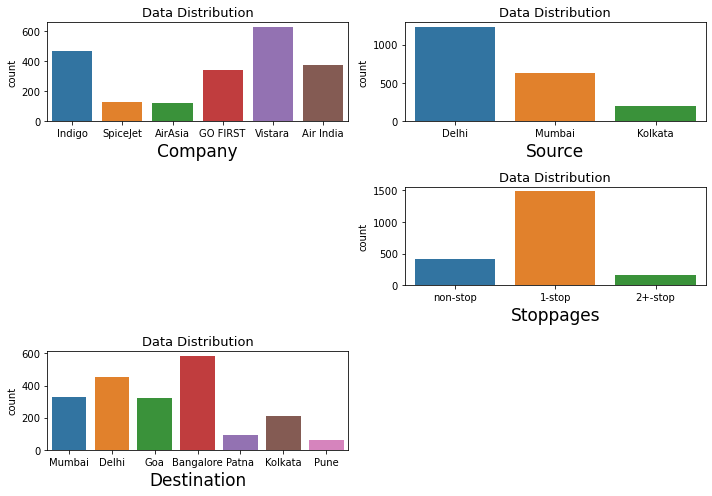

In [39]:
#Plotting counplot for categorical data for visualization

plt.figure(figsize = [10,7])

plotnumber = 1

for column in df:
    if df[column].dtypes=="object" and plotnumber<=5:
        ax = plt.subplot(3,2,plotnumber)
        sns.countplot(x=df[column],)
        plt.xlabel(column,fontsize=17)
        plt.title("Data Distribution", fontsize = 13)
    plotnumber+=1
plt.tight_layout()

**In Company feature as we can see above that there are 6 companies which are operating there flights and flights are mostly of Vistara company, second in the list is Indigo, third Air India and the least operational company is AirAsia**

**There are mainly three sources of these flights which are Delhi, Mumbai and Kolkata. The highest number of flights sources is from Delhi and the least is from Kolkata**

**These operating flights majorly have just 1 stop, some are without any stoppages and least with 2 or more than two stoppages.**

**Destination of flights are 7 and mostly are of Banglore, then Delhi after which its mumbai, goa and the least is of Pune**

In [48]:
df.groupby(by = "Company").mean() #Grouping by Company to analyse of rates and duration by different company.

,Duration,Price,Day,Month,Arrival_Hour,Arrival_Minute,Departure_Hour,Departure_Minute
Company,,,,,,,,
Air India,974.652406,13555.379679,10.283422,10.748663,14.802139,30.414439,13.326203,22.179144
AirAsia,511.056911,10313.365854,17.821138,10.447154,12.162602,25.081301,13.341463,28.658537
GO FIRST,515.117994,9144.200590,11.227139,10.710914,14.342183,27.625369,12.879056,25.073746
Indigo,327.543103,8330.702586,11.381466,10.704741,15.200431,26.799569,12.405172,25.247845
SpiceJet,697.325581,9630.829457,12.914729,10.643411,13.875969,27.868217,14.007752,25.891473
Vistara,1007.040000,15081.670400,16.640000,10.494400,14.588800,36.488000,14.227200,28.040000


**We can see from the above figure that vistara company's price on an average is the highest when it is compared with other company prices and even the duration taken by the flights of that company is also too high**

**The Company which has cheapest rates is Indigo and also the duration of flights operated by Indigo is less**

In [49]:
df.groupby(by = "Source").mean() # Checking from source

,Duration,Price,Day,Month,Arrival_Hour,Arrival_Minute,Departure_Hour,Departure_Minute
Source,,,,,,,,
Delhi,703.432410,11029.135179,13.588762,10.616450,14.499186,30.610749,13.115635,26.999186
Kolkata,714.568528,11592.827411,12.502538,10.659898,14.436548,31.497462,13.796954,27.791878
Mumbai,745.238474,12948.238474,12.783784,10.648649,14.635930,29.992051,13.707472,22.686804


**When we checked the price from Source the highest is also from Delhi and least is from Kolkata**

In [52]:
df.groupby(by = "Stoppages").mean()

,Duration,Price,Day,Month,Arrival_Hour,Arrival_Minute,Departure_Hour,Departure_Minute
Stoppages,,,,,,,,
1-stop,813.897904,12446.722110,13.077079,10.636917,14.620014,30.716700,13.242055,25.824882
2+-stop,1297.155689,15836.149701,14.479042,10.580838,14.586826,36.646707,12.970060,26.437126
non-stop,129.803922,7153.598039,13.313725,10.627451,14.205882,27.230392,13.958333,25.220588


**Lower number of stoppages have low flight rates, with more stoppages the prices are increasing which also shows possitive linear relation between price and stoppages**

In [53]:
df.groupby(by = "Destination").mean()

,Duration,Price,Day,Month,Arrival_Hour,Arrival_Minute,Departure_Hour,Departure_Minute
Destination,,,,,,,,
Bangalore,756.589744,10793.569231,13.017094,10.639316,14.791453,31.427350,13.401709,25.299145
Delhi,659.494505,12171.208791,12.351648,10.665934,14.615385,29.846154,13.419780,24.417582
Goa,799.421875,13490.943750,15.484375,10.540625,13.790625,36.046875,13.612500,25.812500
Kolkata,790.789474,12853.684211,12.014354,10.679426,13.779904,31.889952,13.200957,26.842105
Mumbai,603.685015,10327.048930,14.856269,10.565749,15.314985,24.602446,13.131498,27.522936
Patna,824.468085,13136.957447,12.510638,10.659574,14.212766,32.500000,14.117021,25.691489
Pune,541.718750,7883.250000,7.125000,10.875000,14.296875,21.796875,11.937500,26.640625


**The flight fares for Pune destination is least and duration is also least among all destination whereas for Goa the price is highest among all other cities**

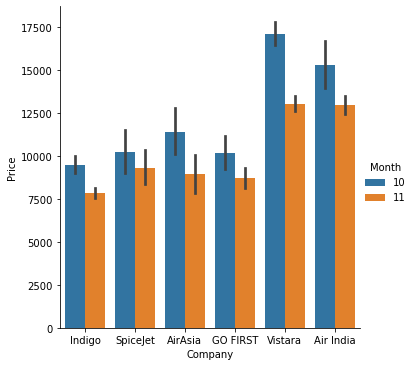

In [59]:
sns.catplot(x="Company", y="Price", hue="Month", kind="bar", data=df) #Plotting cat plot

**Vistara has the highest number of flights for the month of october whereas Indigo has least**

**for the month of November Air India and Vistara have same number of flights while the least is of Indigo**

**Price are decreasing with increase in date of flight which means there is negative linear relation between price and date of flights**

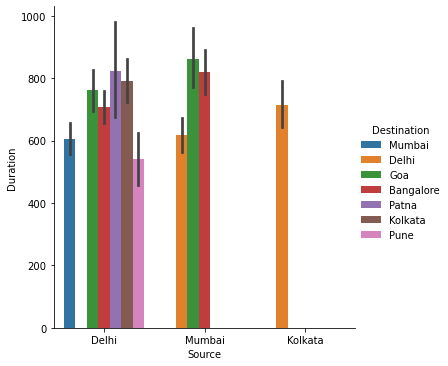

In [63]:
sns.catplot(x="Source", y="Duration", hue="Destination", kind="bar", data=df) #Plotting cat plot

**Flight Duration between Mumbai to Goa is highest whereas for Delhi to Pune the duration is least**

**Number of flights operating from Delhi is highest whereas from Kolkata the flights are only for one destination which is Delhi**

In [15]:
df['Stoppages'].value_counts()

1-stop      1479
non-stop     408
2+-stop      167
Name: Stoppages, dtype: int64

In [93]:
import re
df['Stoppages'] = df['Stoppages'].apply(lambda x: re.sub(r"(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", "", x))
df['Stoppages'].value_counts()

1stop      1473
nonstop     408
2stop       152
Name: Stoppages, dtype: int64

In [94]:
#Replacing values of Stoppages
df['Stoppages'].replace('nonstop', 0, regex = True, inplace = True)# for non-stop
df['Stoppages'].replace('2stop', 2, regex = True, inplace = True) # for 2 or more stops
df['Stoppages'].replace('1stop', 1, regex = True, inplace = True) # for 1 stops
df['Stoppages'].value_counts()

1    1473
0     408
2     152
Name: Stoppages, dtype: int64

<Figure size 1440x1080 with 0 Axes>

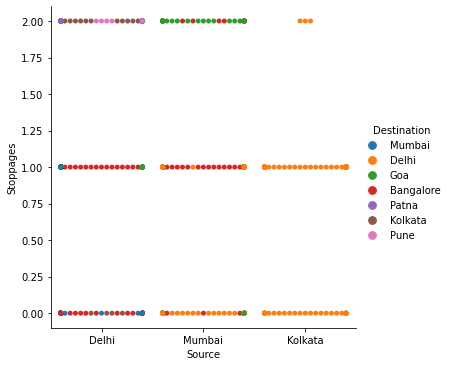

In [77]:
plt.figure(figsize = [20,15])
sns.catplot(x="Source", y="Stoppages", hue="Destination", kind = "swarm" , data=df, ) #Plotting cat plot

**Flight route between Mumbai to Goa has highest number of stoppages on an average**

**Least number of stoppages is in the route Mumbai to Delhi on an average**

**Flights from Delhi are mostly for banglore and have either no stop or 1 stop but not more than that, more than 1 stoppages from delhi for flights are for destination Kolkata and Pune**

**From Mumbai are majorly for three destinations which are Delhi, Bangalore, Goa and have 2 or more than 2 stoppages mostly for Goa and Bangalore but less**

**Flights from Kolkata are for Delhi and have all types of stoppage but less for two or more than two stoppages**

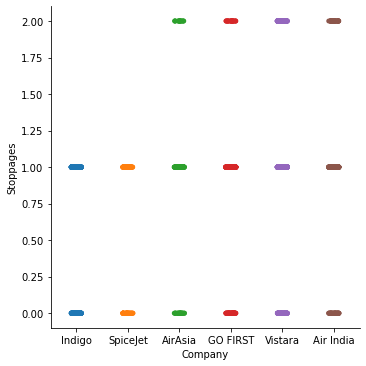

In [81]:
sns.catplot(x = "Company", y ="Stoppages", data = df)

**Indigo and SpiceJet are the companies which have the least number of stoppages in between source and destination mostly without or just 1 stoppages**

**All other companies have all three types of stoppages between Source and Destination**

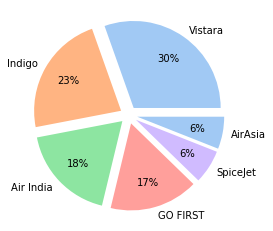

In [59]:
#create pie chart
data = df['Company'].value_counts()
labels = data.keys()
plt.pie(x=data, labels = labels, colors = colors, autopct='%.0f%%',explode = [0.1]*6 ,pctdistance=0.70)
plt.show()

**Above pie chart is clearly indicating that flights operating are most of Vistara company and least of AirAsia and SpiceJet**

In [69]:
df.groupby(by = ['Day','Month']).mean() # To check the difference between prices for each day

,,Duration,Price,Arrival_Hour,Arrival_Minute,Departure_Hour,Departure_Minute
Day,Month,,,,,,
4,11,692.563707,10492.579923,14.342857,29.633205,11.880309,24.127413
29,10,759.512516,13681.312253,14.862978,31.996047,15.890646,28.530962


**We can see from the above figures that on an average the flights for the latter date which is day 4 and month 11 are cheaper which tells us that the flight prices are increases as the departure date gets nearer.**

In [82]:
df.groupby(by = ['Departure_Hour','Month']).mean() # To check the difference between prices on the basis of time

,,Duration,Price,Day,Arrival_Hour,Arrival_Minute,Departure_Minute
Departure_Hour,Month,,,,,,
0,11,527.500000,15550.750000,4.0,8.500000,27.500000,10.000000
1,11,237.000000,7129.400000,4.0,4.400000,42.000000,9.000000
2,11,460.454545,10553.000000,4.0,9.454545,25.454545,12.272727
3,11,127.500000,6841.500000,4.0,5.000000,10.000000,2.500000
4,11,433.666667,8385.266667,4.0,11.466667,27.666667,42.000000
5,11,614.357143,10122.257143,4.0,13.271429,25.571429,30.928571
6,11,596.528926,10720.404959,4.0,13.553719,26.404959,14.008264
7,11,611.033058,10411.264463,4.0,13.834711,27.809917,17.272727
8,10,396.111111,7559.777778,29.0,15.111111,20.555556,51.111111


**From the figures above we can see that morning flights are cheaper**

**This figure is also showing us that for morning flights between 0800 hours to 1200 hours it is cheaper for dates which are close to departure date**

**Afternoon and Evening flights are cheaper on an average for latter dates**

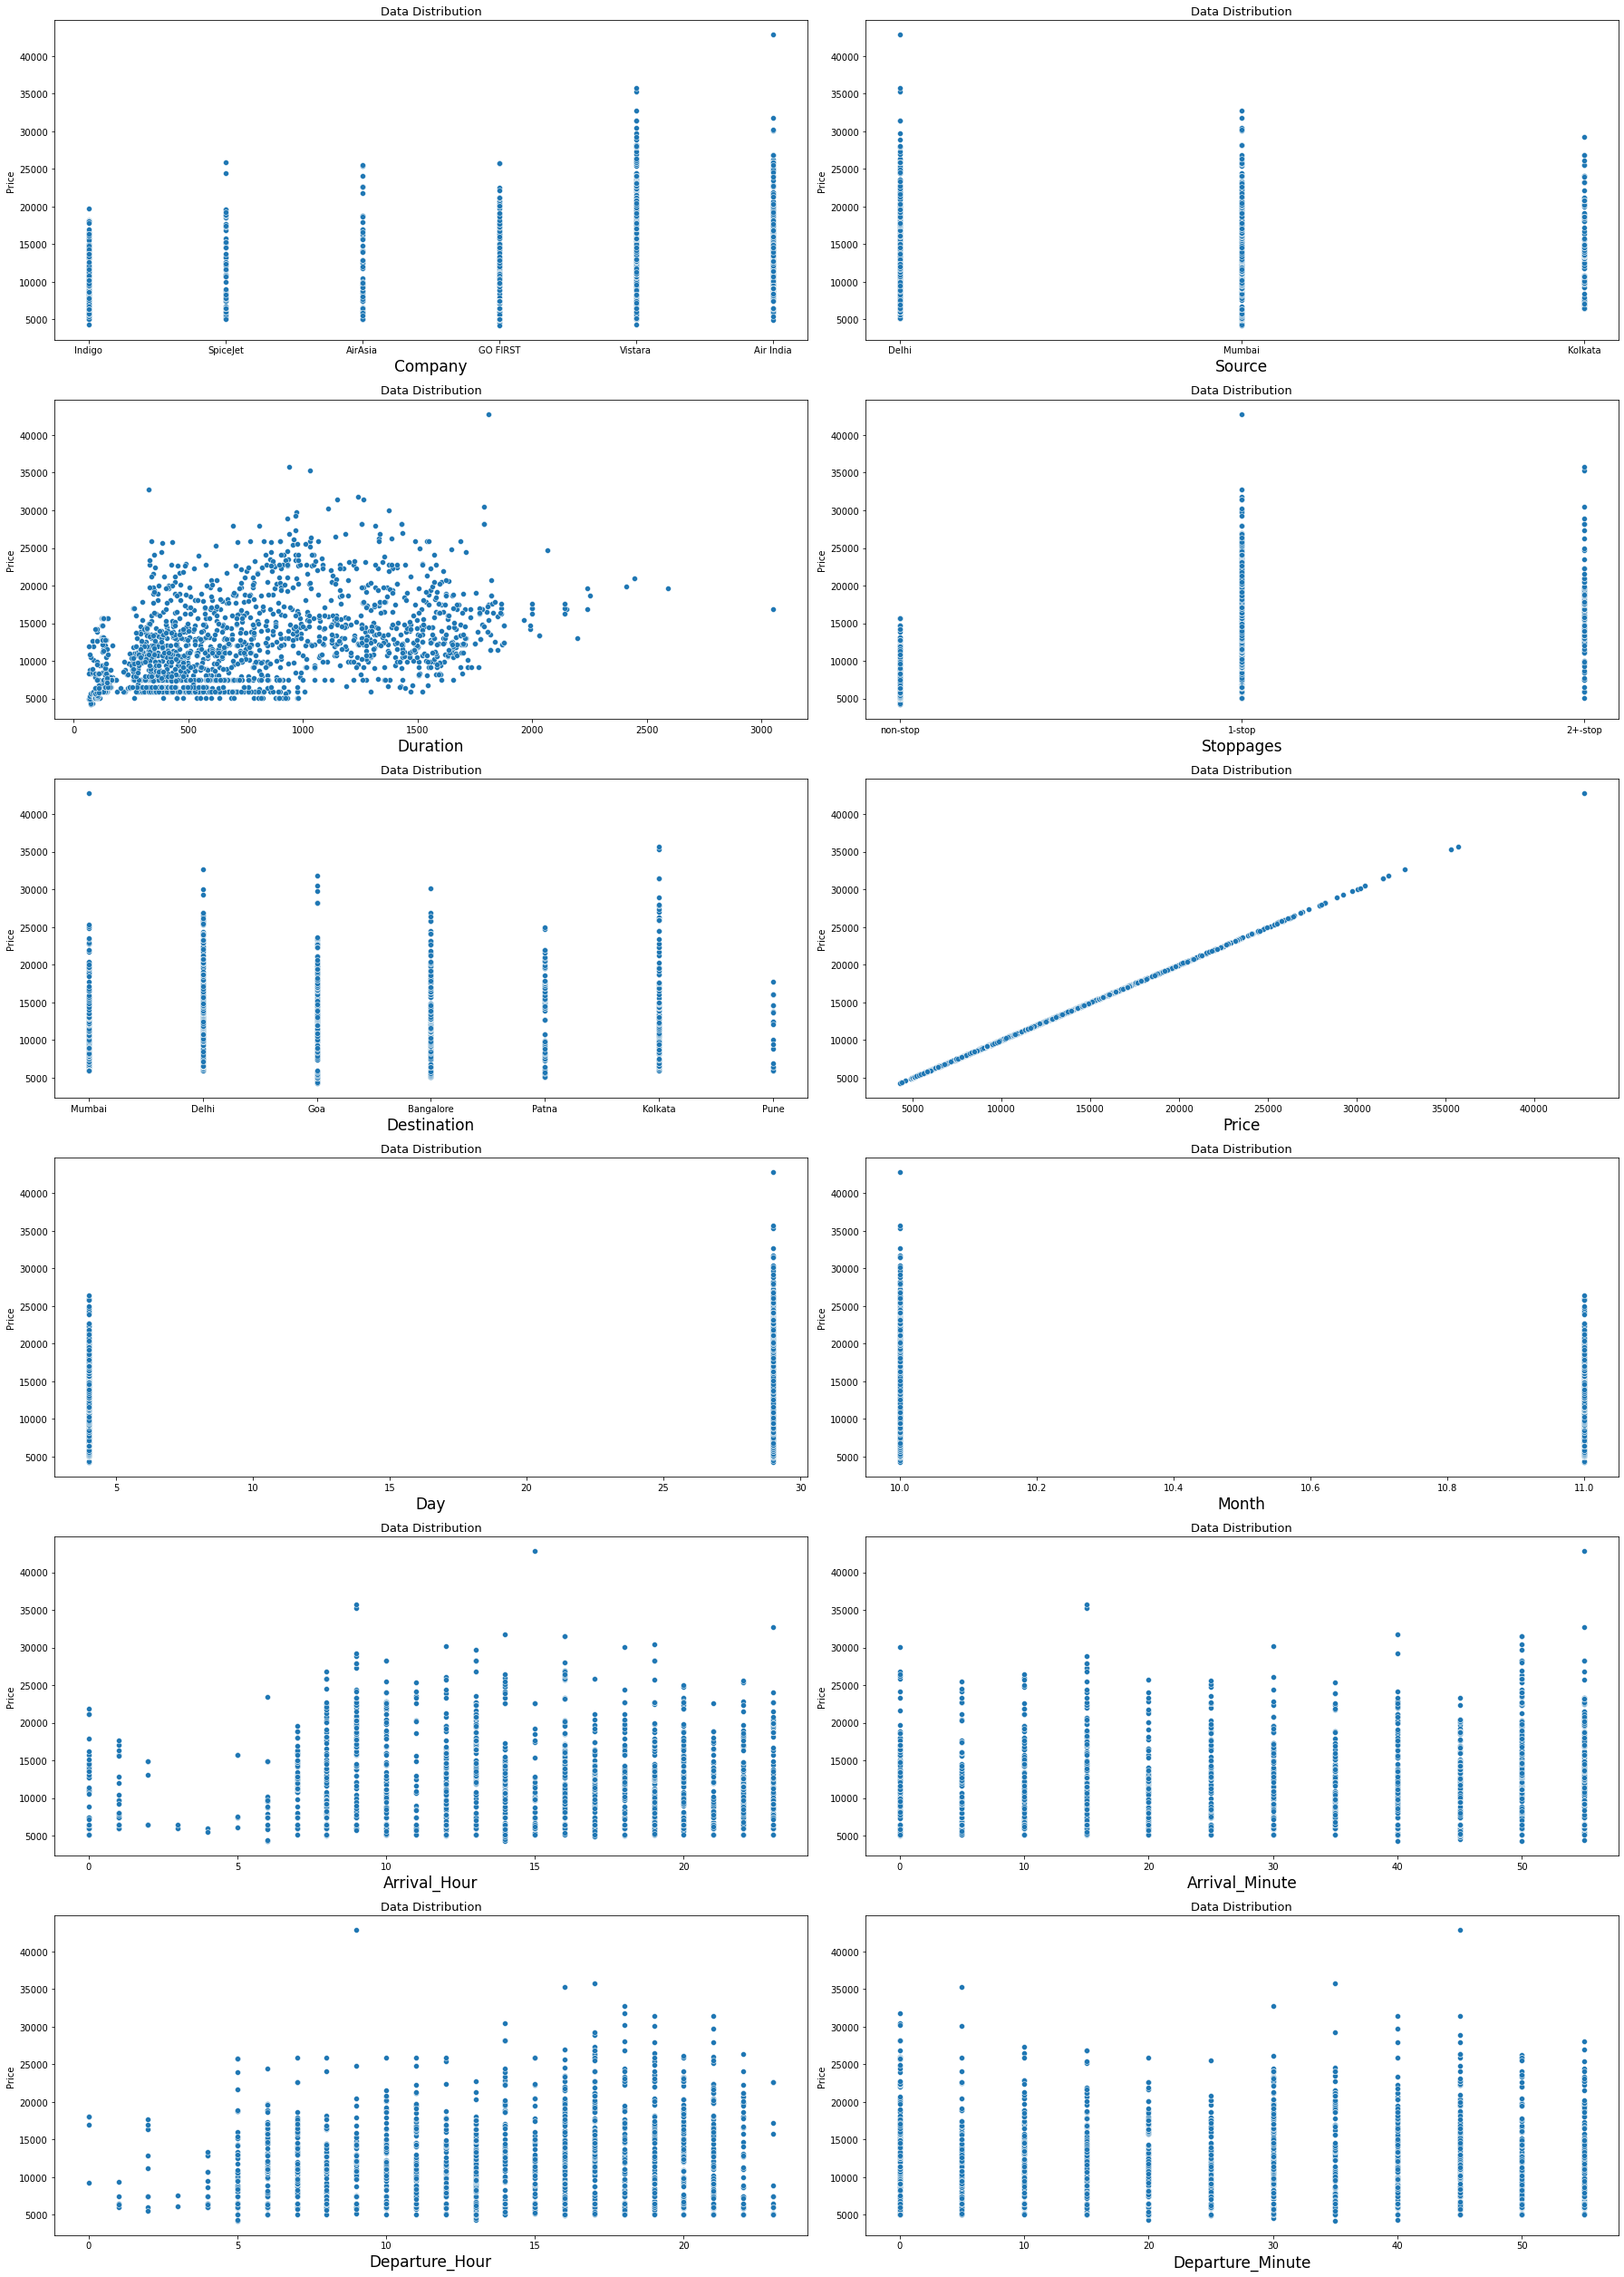

In [86]:
#Lets now plot scatter plot for each column in df with respect to price to understand the data.

plt.figure(figsize = [25,35])
plotnumber = 1

for column in df:
    if plotnumber<=12:
        ax = plt.subplot(6,2,plotnumber)
        sns.scatterplot(x = df[column], y= df['Price'])
        plt.xlabel(column, fontsize = 17)
        plt.title("Data Distribution", fontsize = 13)
    plotnumber += 1
plt.tight_layout()

**Above figure is showing some positive linear relation between Duration and Price, Stoppages and Pice, Departure_Hour and Price, and Negative relation between Month and Price**

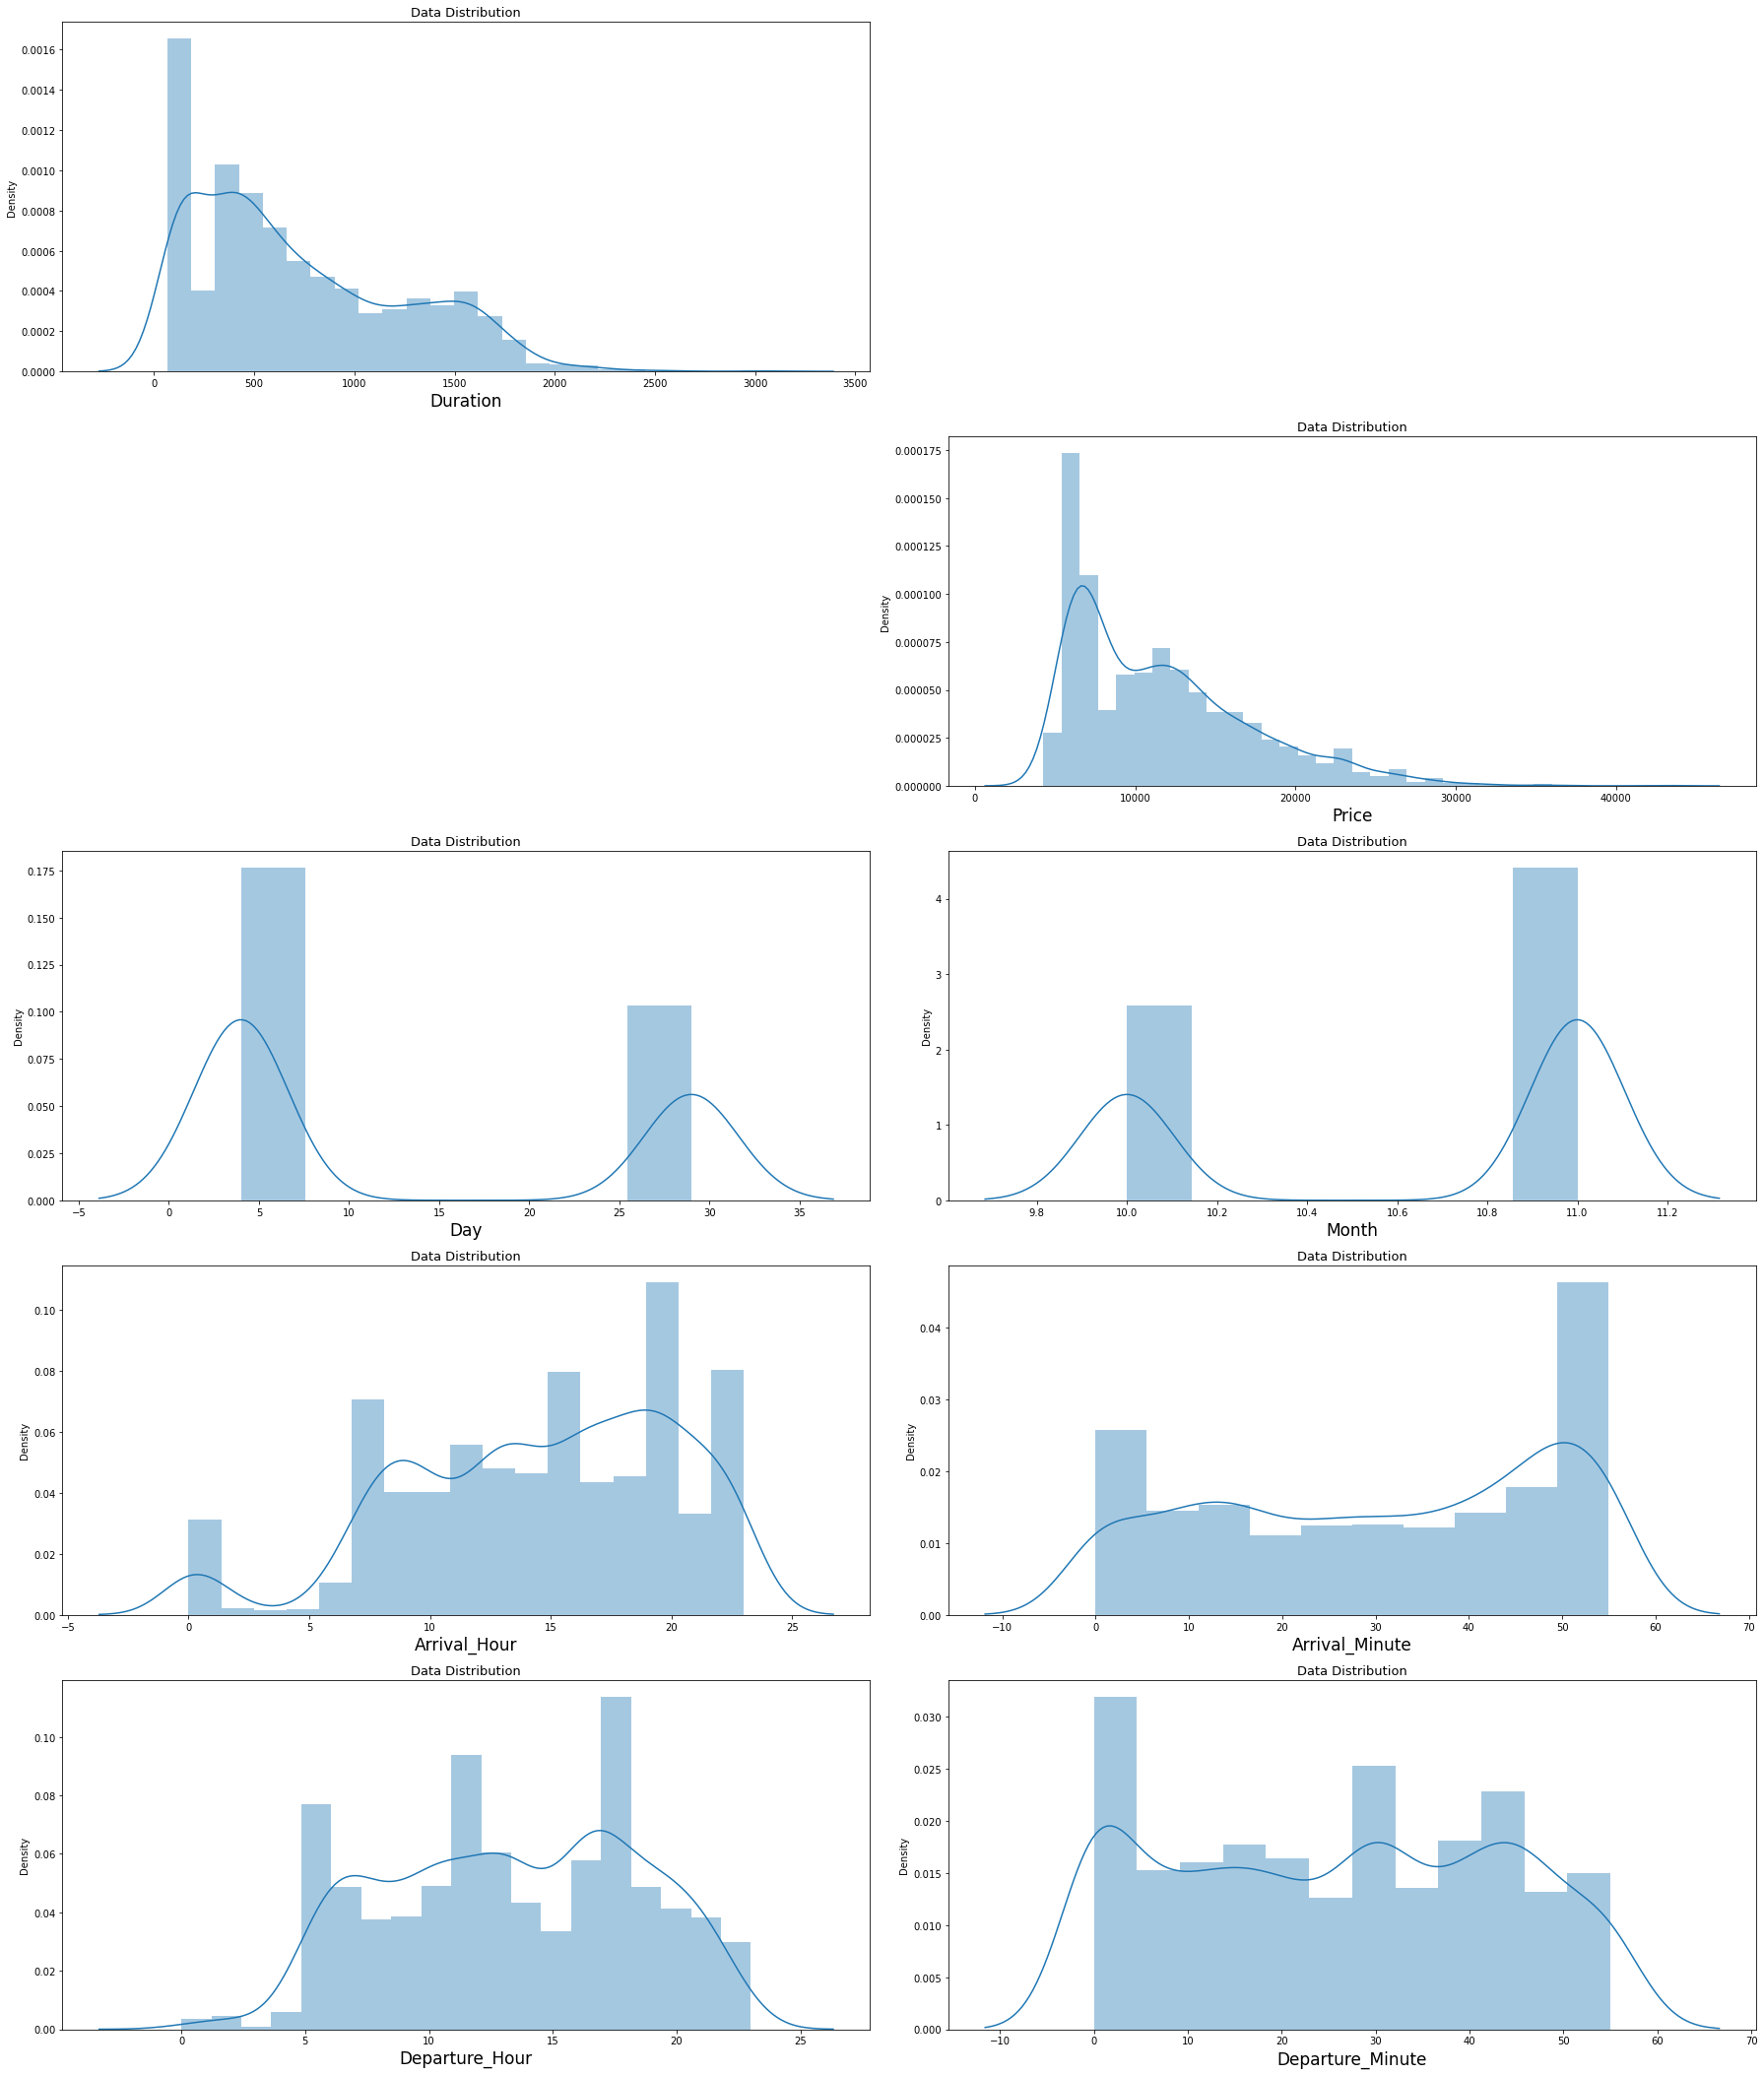

In [88]:
#Let's now check for skewness in the dataset

plt.figure(figsize=[25,35])
plotnumber = 1

for column in df:
    if df[column].dtypes=="int64" or df[column].dtypes=="float64" and plotnumber<=12:
        ax = plt.subplot(6,2,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=17)
        plt.title("Data Distribution", fontsize = 13)
    plotnumber+=1
plt.tight_layout()

**There is a bit skewness in the feature Duration, rest of the data is looking fine**

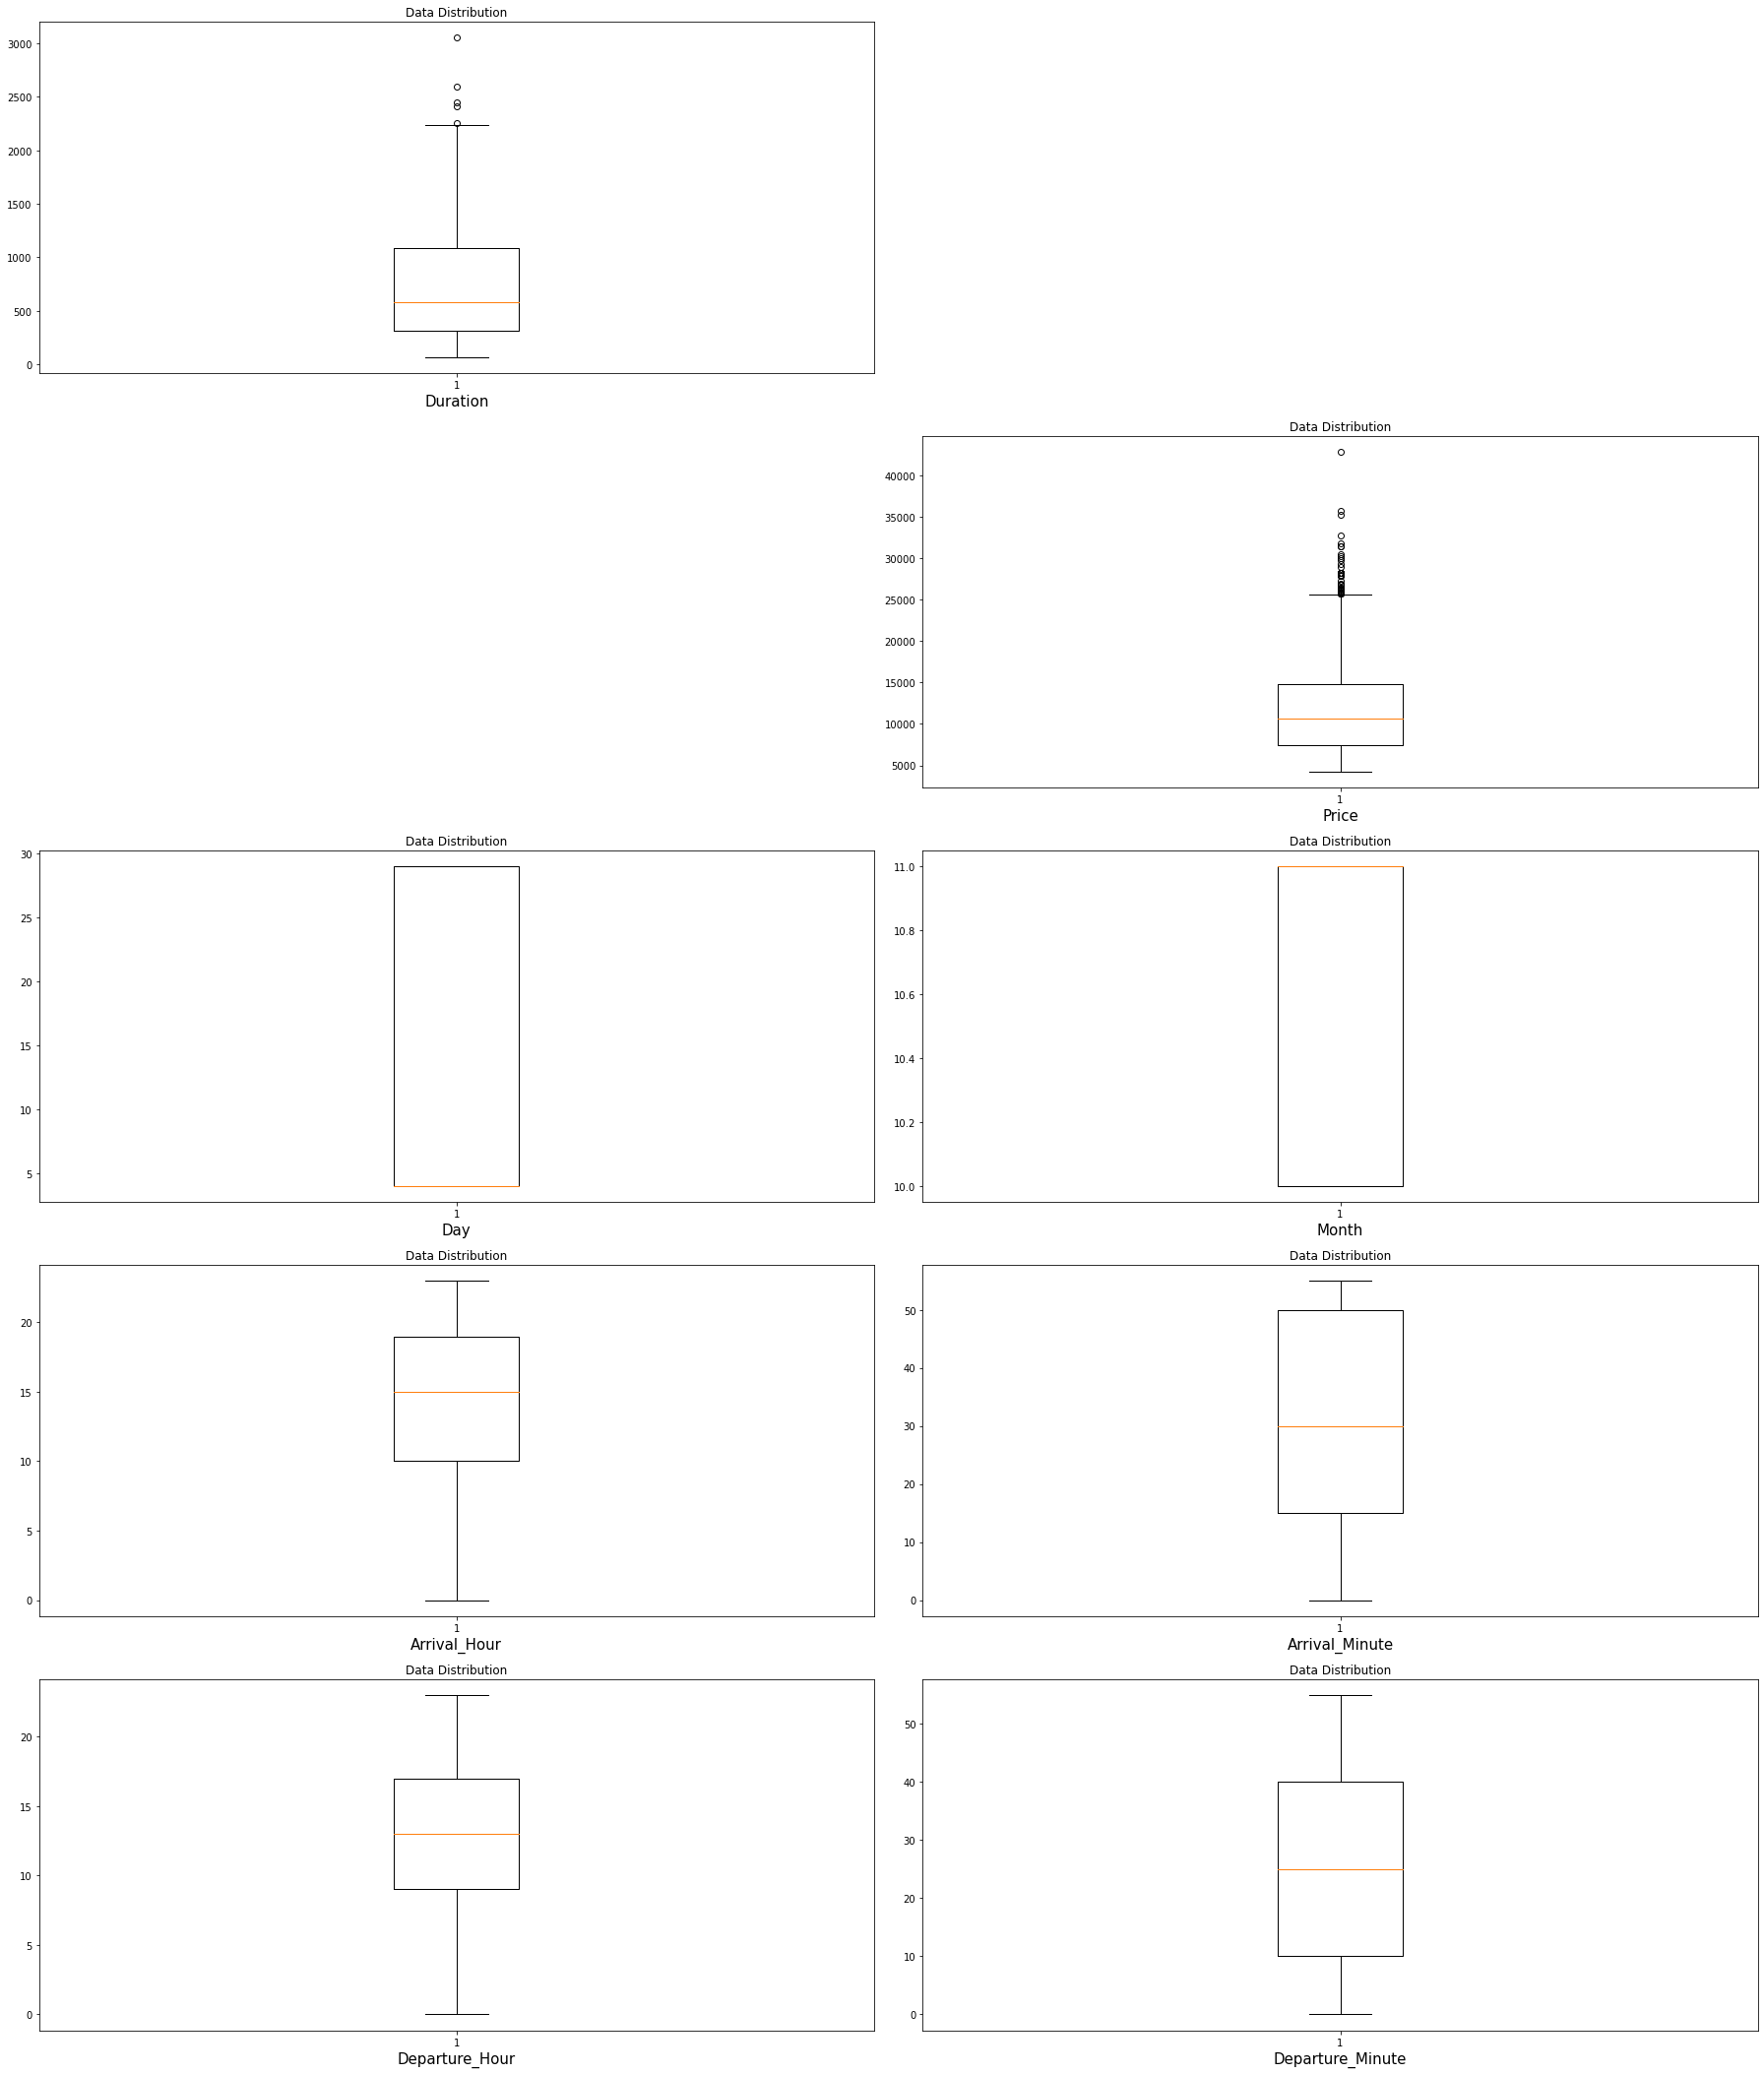

In [90]:
#Checking for outliers in the dataset.

plt.figure(figsize = [25,35])
plotnumber = 1

for column in df:
    if df[column].dtypes=="int64" or df[column].dtypes=="float64" and plotnumber<=12:
        ax = plt.subplot(6,2,plotnumber)
        plt.boxplot(x = df[column])
        plt.xlabel(column, fontsize = 15)
        plt.title("Data Distribution", fontsize = 12)
    plotnumber += 1
plt.tight_layout()

**Only Duration feature has some outliers in it**

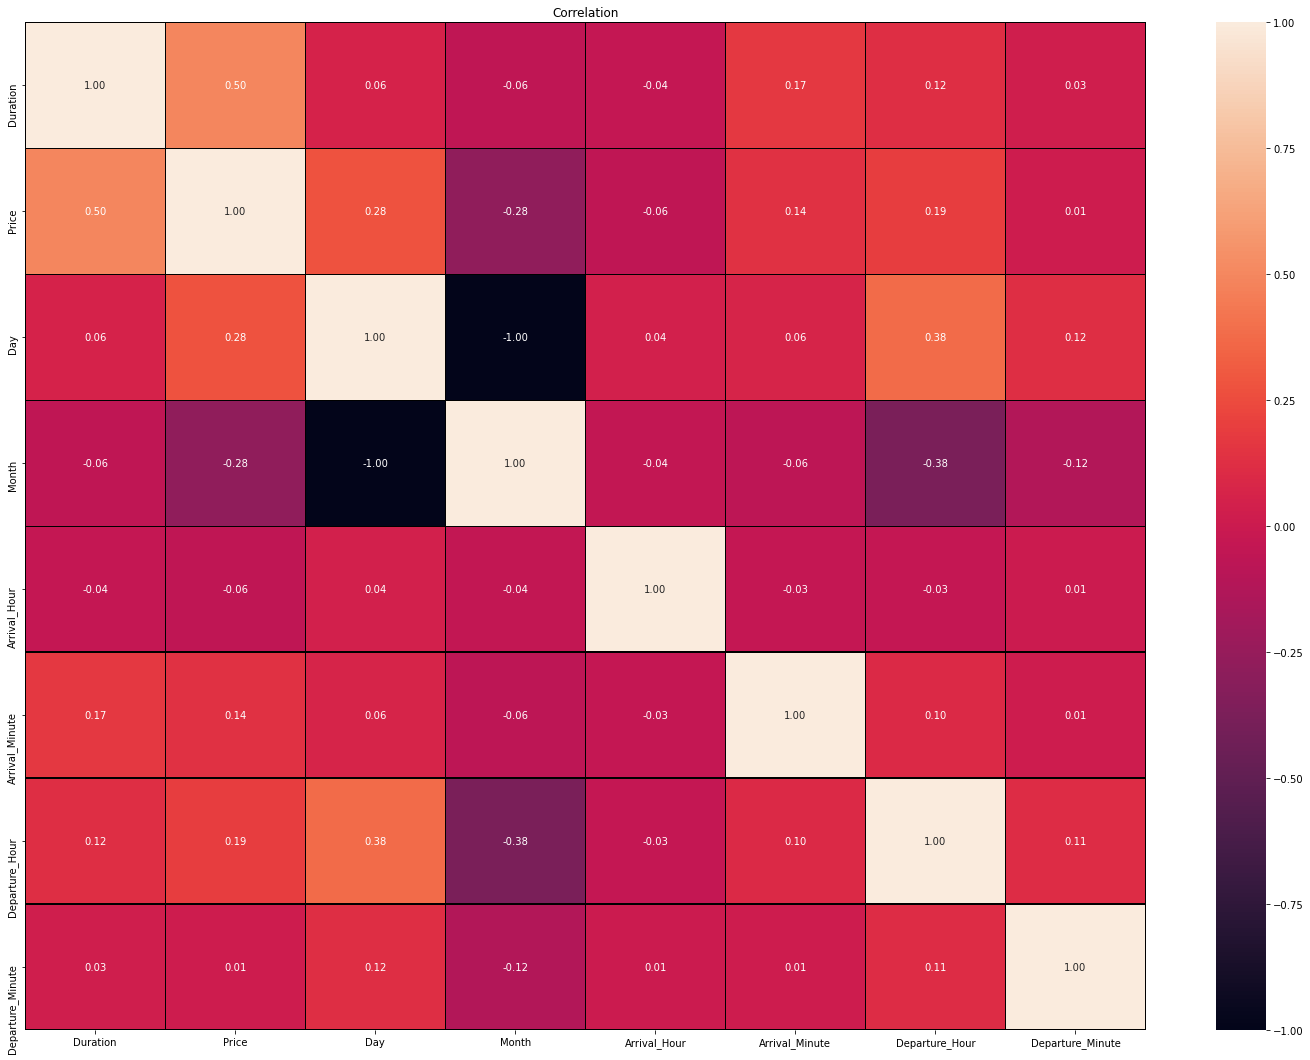

In [91]:
#Let's check for co-relation among features

plt.figure(figsize = [20,15])
sns.heatmap(df.corr(),annot=True, linewidths=0.3,linecolor="black",fmt='.2f')
plt.title('Correlation')
plt.tight_layout()

**There is hardly any co-relation amongst the features**

### Data Pre-Processing

In [92]:
#Removing skewness from the feature Duration

q = df['Duration'].quantile(0.99)
df = df[df['Duration']<q]
df.skew()

Duration            0.646686
Price               1.106573
Day                 0.548141
Month              -0.548141
Arrival_Hour       -0.556330
Arrival_Minute     -0.208464
Departure_Hour     -0.117957
Departure_Minute    0.014470
dtype: float64

In [97]:
df.head(2)

,Company,Source,Duration,Stoppages,Destination,Price,Day,Month,Arrival_Hour,Arrival_Minute,Departure_Hour,Departure_Minute
0,Indigo,Delhi,125,0,Mumbai,5955.0,29,10,13,5,11,0
1,Indigo,Delhi,125,0,Mumbai,5955.0,29,10,15,15,13,10


In [98]:
#Removing outliers with the help of Z-score Method.

from scipy import stats

z = np.abs(stats.zscore(df['Duration']))
i = np.where(z>3)[0]

print(z)

[1.15531932 1.15531932 1.15531932 ... 0.54449644 0.31666369 0.66713583]


In [99]:
df = df.drop(df.index[i]) # Removing the indexes from the entire datatset.
df.head(2)

,Company,Source,Duration,Stoppages,Destination,Price,Day,Month,Arrival_Hour,Arrival_Minute,Departure_Hour,Departure_Minute
0,Indigo,Delhi,125,0,Mumbai,5955.0,29,10,13,5,11,0
1,Indigo,Delhi,125,0,Mumbai,5955.0,29,10,15,15,13,10


In [100]:
#Separating label and features
x = df.drop(['Price'], axis =1)
y = df['Price']

In [101]:
#Lets first convert the string values in int for further processing of data with the help of label encoder.

from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()

for i in x.columns:
    if x[i].dtypes=="object":
        x[i] = LE.fit_transform(x[i].values.reshape(-1,1))

### Model Building

In [103]:
#Scaling the data

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [104]:
#Doing Train Test Split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size = 0.20, random_state = 100)

In [105]:
#Importing Algorithms and necessary metrics for evaluation

import xgboost
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [106]:
LR = LinearRegression()
DT = DecisionTreeRegressor()
RF = RandomForestRegressor()
XGB = XGBRegressor()
ABR = AdaBoostRegressor()

In [107]:
#training with the all of them

LR.fit(x_train,y_train)
DT.fit(x_train,y_train)
RF.fit(x_train,y_train)
XGB.fit(x_train,y_train)
ABR.fit(x_train,y_train)

print("All Models Trained")

All Models Trained


In [108]:
#Accuracy scores
print('Linear Regression =',LR.score(x_train,y_train))
print('Decision Tree =',DT.score(x_train,y_train))
print('Random Forest =',RF.score(x_train,y_train))
print('XGB =',XGB.score(x_train,y_train))
print('Ada Boost Regressor =',ABR.score(x_train,y_train))

Linear Regression = 0.38320898226921385
Decision Tree = 0.9989442298093194
Random Forest = 0.9523829873775299
XGB = 0.9863635833517114
Ada Boost Regressor = 0.2810729788326737


In [109]:
#R2_Scores for each of the model
from sklearn.metrics import r2_score

print('Linear Regression =', r2_score(y_test,LR.predict(x_test)))
print('Decision Tree =', r2_score(y_test,DT.predict(x_test)))
print('Random Forest =', r2_score(y_test,RF.predict(x_test)))
print('XGB =', r2_score(y_test,XGB.predict(x_test)))
print('Ada Boost Regressor =', r2_score(y_test,ABR.predict(x_test)))

Linear Regression = 0.3606966538172123
Decision Tree = 0.3950891138627671
Random Forest = 0.6387812571404461
XGB = 0.5945143491293415
Ada Boost Regressor = 0.1800245081621794


In [110]:
#Mean Squared Error
print('Linear Regression =', mean_squared_error(y_test,LR.predict(x_test)))
print('Decision Tree =', mean_squared_error(y_test,DT.predict(x_test)))
print('Random Forest =', mean_squared_error(y_test,RF.predict(x_test)))
print('XGB =', mean_squared_error(y_test,XGB.predict(x_test)))
print('Ada Boost Regressor =', mean_squared_error(y_test,ABR.predict(x_test)))

Linear Regression = 19804863.067588896
Decision Tree = 18739425.250273
Random Forest = 11190130.291817132
XGB = 12561466.85187139
Ada Boost Regressor = 25401872.88490078


In [111]:
#Mean Absolute Error
print('Linear Regression =', mean_absolute_error(y_test,LR.predict(x_test)))
print('Decision Tree =', mean_absolute_error(y_test,DT.predict(x_test)))
print('Random Forest =', mean_absolute_error(y_test,RF.predict(x_test)))
print('XGB =', mean_absolute_error(y_test,XGB.predict(x_test)))
print('Ada Boost Regressor =', mean_absolute_error(y_test,ABR.predict(x_test)))

Linear Regression = 3372.7796743516033
Decision Tree = 2606.8775593775595
Random Forest = 2239.420831110331
XGB = 2369.1974515797756
Ada Boost Regressor = 4310.440309538788


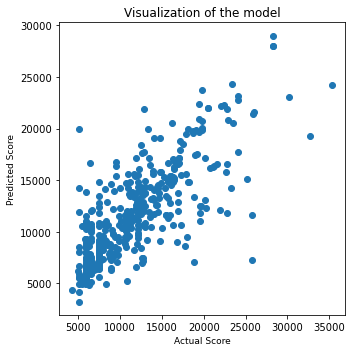

In [115]:
plt.figure(figsize = [5,5])
plt.scatter(y_test,XGB.predict(x_test))
plt.xlabel('Actual Score', fontsize=9)
plt.ylabel('Predicted Score',fontsize=9)
plt.title('Visualization of the model', fontsize = 12)
plt.tight_layout()

In [118]:
#Checking Cross Validation

from sklearn.model_selection import cross_val_score

cvs = cross_val_score(XGB,x_train,y_train,cv=5)

cvs.mean()

0.6156140697586129

### HyperParameter Tuning

In [119]:
from sklearn.model_selection import GridSearchCV

In [134]:
LR_Params = {'copy_X':[True,False],
         'fit_intercept':[True,False],
        'normalize' :[True,False]}

DT_Params = {'criterion':['mse','mae'],
        'splitter': ['best', 'random'],
          'min_samples_leaf': list(range(2,8)),
         'min_samples_split': list(range(4,10)),
         'max_depth':list(range(8,15))}


RF_Params =  {'n_estimators':list(range(110,170,10)),
         'max_depth':list(range(9,16)),
         'min_samples_leaf': list(range(3,13)),
         'min_samples_split': list(range(6,12))}

XGB_Params = {'max_depth':list(range(1,6)),
         'n_estimators':list(range(100,150,10)),
          'learning_rate' :[0.25,0.30],
             'booster':['gbtree','gblinear']}

ABR_Params = {'n_estimators':list(range(100,150,10)),
        'learning_rate' :[0.25,0.30],
          'loss' : ['linear', 'square', 'exponential']}

In [135]:
LR_grid = GridSearchCV(LR, param_grid= LR_Params, cv = 2, n_jobs=-1)

DT_grid = GridSearchCV(DT, param_grid= DT_Params, cv = 2, n_jobs=-1)

RF_grid = GridSearchCV(RF, param_grid= RF_Params, cv = 2, n_jobs=-1)

XGB_grid = GridSearchCV(XGB, param_grid= XGB_Params, cv = 2, n_jobs=-1)

ABR_grid = GridSearchCV(ABR, param_grid= ABR_Params, cv = 2, n_jobs=-1)

In [136]:
LR_grid.fit(x_train,y_train)

DT_grid.fit(x_train,y_train)

RF_grid.fit(x_train,y_train)

XGB_grid.fit(x_train,y_train)

ABR_grid.fit(x_train,y_train)

GridSearchCV(cv=2, estimator=AdaBoostRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.25, 0.3],
                         'loss': ['linear', 'square', 'exponential'],
                         'n_estimators': [100, 110, 120, 130, 140]})

In [137]:
print('Best Estimators == > \n', LR_grid.best_params_)
print('Best Estimators == > \n', DT_grid.best_params_)
print('Best Estimators == > \n', RF_grid.best_params_)
print('Best Estimators == > \n', ABR_grid.best_params_)
print('Best Estimators == > \n', XGB.best_params_)

Best Estimators == > 
 {'copy_X': True, 'fit_intercept': True, 'normalize': True}
Best Estimators == > 
 {'criterion': 'mse', 'max_depth': 9, 'min_samples_leaf': 2, 'min_samples_split': 9, 'splitter': 'random'}
Best Estimators == > 
 {'max_depth': 15, 'min_samples_leaf': 3, 'min_samples_split': 6, 'n_estimators': 140}
Best Estimators == > 
 {'learning_rate': 0.3, 'loss': 'linear', 'n_estimators': 110}


AttributeError: 'XGBRegressor' object has no attribute 'best_params_'

In [138]:
LR_clf= LR_grid.best_estimator_

DT_clf= DT_grid.best_estimator_

RF_clf= RF_grid.best_estimator_

XGB_clf= XGB_grid.best_estimator_

ABR_clf= ABR_grid.best_estimator_

In [139]:
print("Linear Regression",LR_clf.fit(x_train, y_train))
print("Decision Tree Regression",DT_clf.fit(x_train, y_train))
print("Random Forest Regression",RF_clf.fit(x_train, y_train))
print("XGB Regression",XGB_clf.fit(x_train, y_train))
print("Adaboost Regression",ABR_clf.fit(x_train, y_train))

Linear Regression LinearRegression(normalize=True)
Decision Tree Regression DecisionTreeRegressor(max_depth=9, min_samples_leaf=2, min_samples_split=9,
                      splitter='random')
Random Forest Regression RandomForestRegressor(max_depth=15, min_samples_leaf=3, min_samples_split=6,
                      n_estimators=140)
XGB Regression XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.25, max_delta_step=0,
             max_depth=5, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)
Adaboost Regression AdaBoost

In [140]:
#Accuracy scores
print('Linear Regression =',LR_clf.score(x_test,y_test))
print('Decision Tree =',DT_clf.score(x_test,y_test))
print('Random Forest =',RF_clf.score(x_test,y_test))
print('XGB =',XGB_clf.score(x_test,y_test))
print('Ada Boost Regressor =',ABR_clf.score(x_test,y_test))

Linear Regression = 0.36069665381721217
Decision Tree = 0.49457163561754525
Random Forest = 0.6108594665064953
XGB = 0.5889379936238552
Ada Boost Regressor = 0.2909174982146112


In [141]:
#Mean Squared Error Scores
print('Linear Regression =', mean_squared_error(y_test,LR_clf.predict(x_test)))
print('Decision Tree =', mean_squared_error(y_test,DT_clf.predict(x_test)))
print('Random Forest =', mean_squared_error(y_test,RF_clf.predict(x_test)))
print('SVC =', mean_squared_error(y_test,XGB_clf.predict(x_test)))
print('Ada Boost Regressor =', mean_squared_error(y_test,ABR_clf.predict(x_test)))


Linear Regression = 19804863.0675889
Decision Tree = 15657574.149796376
Random Forest = 12055114.408370111
SVC = 12734215.763419831
Ada Boost Regressor = 21966538.944827873


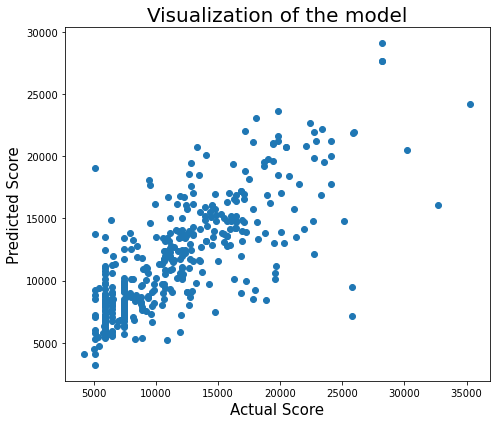

In [146]:
plt.figure(figsize = [7,6])
plt.scatter(y_test,XGB_clf.predict(x_test))
plt.xlabel('Actual Score', fontsize=15)
plt.ylabel('Predicted Score',fontsize=15)
plt.title('Visualization of the model', fontsize = 20)
plt.tight_layout()

### Saving the best model

In [147]:
import joblib
filename = 'Flight Price Model.sav'
joblib.dump(XGB, filename)

['Flight Price Model.sav']